Ecole Polytechnique, 2022_2023

# TP2 - Markov Jump Processes

A few reminders in python:

-random.exponential from the numpy module. For simulating exponential random variables (be carfeul with parameters).

-random.poisson from the numpy module. For simulating Poisson random variables.

-poisson.sf from the scipy.stats module. For the survival function of a Poisson random variable.

-cumsum from the numpy module. For computing the cumulative sum of elements in an array.

-sort from the numpy module. For sorting the elements of an array.

In [25]:
import numpy as np
import scipy as sc
import scipy.stats as scs
import matplotlib.pyplot as plt
from numpy import zeros, cumsum, arange, append
from numpy.random import poisson, rand, exponential
from matplotlib.pyplot import figure, step, title, legend

## 1.The Markov Jump process

### 1.1. Presentation of the model

Let us suppose that a machine has a random lifetime following an exponential distribution with parameter $\gamma>0$. When it breaks down, it is replaced, after a delay following an exponential distribution with parameter $\mu>0$, by another identical machine that will also break down after a random time following an exponential distribution with parameter $\gamma>0$. The replacement process continues in the same way, with each machine being replaced after a random delay following an exponential distribution with parameter $\mu>0$ and so on.

We introduce $(X_{t})_{t \geqslant 0}$ the Markov Jump process such that, for every $t\geqslant 0$, $X_{t}=1$ if the machine is working and $X_{t}=0$ otherwise.


### 1.2. Simulation of the Markov Jump process

1. Propose a simulation method for the path of the Markov Jump process on $[0,T]$ starting from $x \in \{0,1\}$.

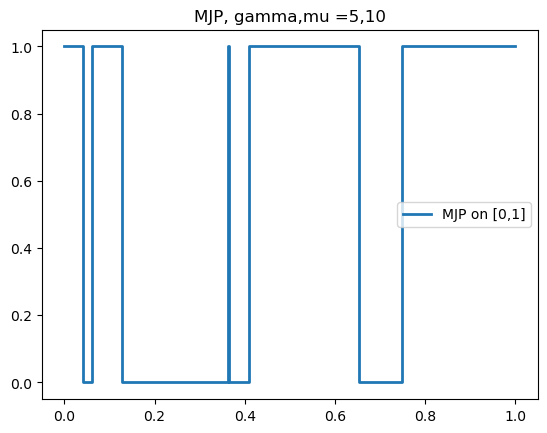

In [26]:
###############################################################################
## Simulation until T
###############################################################################
# This function return the two table events and jump. 
#"events" stores the jump times Tn and add a jump time at time T
#"jumps" stores the the position of the Poisson process after the jump. The last jump at time T has size 0
###############################################################################

def simul_model(x,gamma,mu,T):    
    scale_gamma = 1. / gamma
    scale_mu = 1. / mu
    #E stores the interjump exponential times
    #For the last term at time 0
    E=[0]
    jumps=[x]
    while np.sum(E)<=T :
        if (-1)**(x+np.size(E))==1 :
            E.append(?)
            jumps.append(?)
        else :
            E.append(?)
            jumps.append(?)
    #For the last term at time T, we add an artificial jump of size 0
    E[np.size(E)-1]=T-np.cumsum(E)[-2]
    events = np.cumsum(E)
    jumps[np.size(E)-1]=jumps[np.size(E)-2]
    return events, jumps
x=1
gamma = 5
mu=10
T=1

events, jumps = simul_model(x,gamma,mu,T)
step(events, jumps, where="post", label="MJP on [0,"+ str(T)+"]", linewidth=2.0)
title("MJP, gamma,mu =" + str(gamma)+","+ str(mu), fontsize=12)
legend(loc="best")



## 2.Estimation of Probability

We aim to illustrate numerically the fact that $\forall x \in E=\{0,1 \}$,
\begin{align*}
P_{t}(x,1)=\mathbb{P}(X_{t}=1\vert X_{0}=x)=& \exp(-(\mu+\gamma)t)P_{0}(x,1) + \frac{\mu}{\gamma+\mu}(1- \exp(-(\mu+\gamma)t))
\end{align*}
and 
\begin{align*}
P_{t}(x,0)=\mathbb{P}(X_{t}=0\vert X_{0}=x)=& \exp(-(\mu+\gamma)t)P_{0}(x,0) + \frac{\gamma}{\gamma+\mu}(1- \exp(-(\mu+\gamma)t)).
\end{align*}

2. Propose a Monte Carlo approximation of $ \mathbb{P}_{t}(x,y)$ for every $x,y \in E$.

In [38]:
###############################################################################
#This function returns the value of Pt(x,y)
###############################################################################
def Prob_Model(M,gamma,mu,T,x,y):
    E=0
    if y==0:
        if x==0:
            E=?
        else:
            E=?
    else: 
        if x==1:
            E=?
        else:
            E=?
    return E


###############################################################################
#This function returns M samples of XT
###############################################################################
def Sample_Model(M,gamma,mu,T,x):
    sample=[]
    for i in range(1,M):
        events, jumps = simul_model(x,gamma,mu,T)
        sample.append(?)
    return sample

###############################################################################
#This function returns the Monte Carlo mean estimator and the variance estimator at time t=T of  for M samples
###############################################################################
def LLN_Prob_Model(M,gamma,mu,T,x,y):
    sample = Sample_Model(M,gamma,mu,T,x)
    sample_new=[]
    for i in range(1,M):
        if sample[i-1]==y:
            sample_new.append(?)
        else:
            sample_new.append(?)
    return ?,?


#Parameters
x=1
y=0
gamma=0.02
mu=0.01
T=1000
M=10000

#Computation of the CI
mean,std=LLN_Prob_Model(M,gamma,mu,T,x,y)
lenght_IC=2*1.96*std/np.sqrt(M)

print("Exact probability")
print(Prob_Model(M,gamma,mu,T,x,y))
print("\n")
print("Monte Carlo Probability,Asymptotic Confidence interval 95%")
print("CI={:1.10f} +/- {:1.6f} \n".format(mean,lenght_IC/2))
print("CI=[{:1.10f}, {:1.6f}] \n".format(mean-1.96*std/np.sqrt(M),mean+1.96*std/np.sqrt(M)))
print("Relative error = lenght_CI/MonteCarloProba={:1.10f} % \n".format(100*lenght_IC/mean))

Exact probability
0.6666666666666042


Monte Carlo Probability,Asymptotic Confidence interval 95%
CI=0.6686668667 +/- 0.009226 

CI=[0.6594412925, 0.677892] 

Relative error = lenght_CI/MonteCarloProba=2.7593932579 % 



## 3.Asymptotic behavior

We aim to illustrate the asymptotic behavior of $(X_{t})_{t \geqslant 0}$. We recall that the invariant distribution of $(X_{t})_{t \geqslant 0}$ is given by $\pi \in [0,1]^{2}$ such that $\pi(0)=\frac{\gamma}{\gamma+\mu} =1-\pi(1)$.

3. Draw the logarithm of $\sum_{y \in E}\vert \mathbb{P}(X_{t}=y \vert X_{0}=x)- \pi(y)   \vert $ with respect to the time for a choosen $x \in E$. Comment. 

Invariant distribution
pi=[0.666667,0.333333]


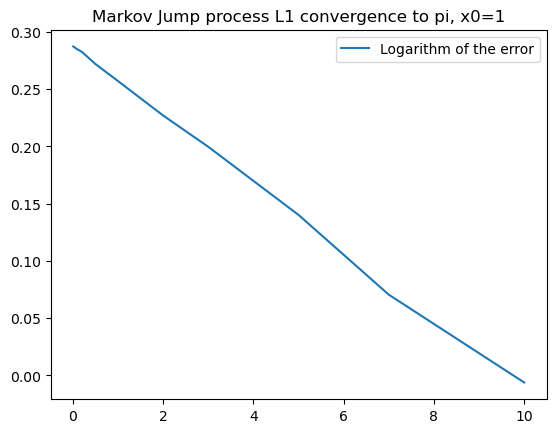

In [31]:
###############################################################################
## Illustration of the exponential convergence
###############################################################################

def vector_ln_err(M,gamma,mu, vect_T,x):
    pi=[]
    pi.append(gamma/(gamma+mu))
    pi.append(mu/(gamma+mu))
    Err=[]
    for T in vect_T:
        err_curr= ?
        Err.append(np.log(err_curr))
    return Err

#Parameters
M=10000
gamma=0.02
mu=0.01
vect_T=[0.01,0.1,0.2,0.5,1,2,3,5,7,10]
x=1

#Drawing
print("Invariant distribution")
print("pi=[{:1.6f},{:1.6f}]".format(gamma/(gamma+mu),mu/(gamma+mu)))
error=vector_ln_err(M,gamma,mu,vect_T,x)
plt.plot(vect_T, error, label="Logarithm of the error")
title("Markov Jump process L1 convergence to pi, x0="+ str(x), fontsize=12)
legend(loc="best")


We want to illustrate the following result known as the ergodic theorem.
For every $f \in L_{1}(\pi)$, $\lim_{T \to \infty}\frac{1}{T}\int_{0}^{T} f(X_{t})dt = \pi(f) \quad a.s.$

4. Draw the absolute value of $\frac{1}{T}\int_{0}^{T} f(X_{t})dt - \pi(f)$ with respect to $T$ for a choosen $x \in E$. Choose for instance $f:x \mapsto (x+1)^{2}$. Comment. 

Invariant distribution
pi=[0.666667,0.333333]
Measure of f under the invariant distribution
pi(f)=2.000000


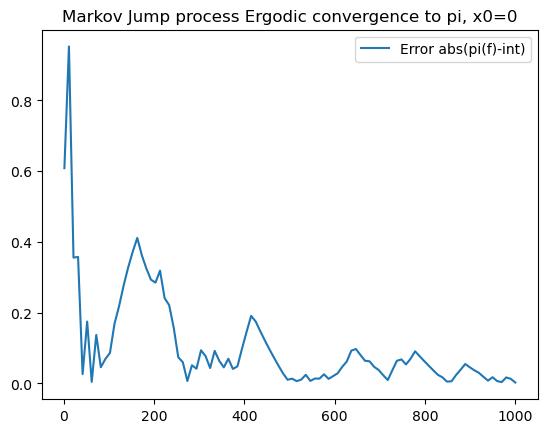

In [95]:
###############################################################################
## Illustration of the ergodic theorem
###############################################################################

def func(x):
    return (x+1)**2

def vector_ergo_err(gamma,mu, vect_T,x):
    pi=[]
    pi.append(gamma/(gamma+mu))
    pi.append(mu/(gamma+mu))
    Err=[]
    #Computation of pi(f)
    pi_func=?
    
    path=simul_model(x,gamma,mu,vect_T[-1])
    
    #Computation of the function on the path
    func_path=np.zeros(np.size(path[1]))
    for i in range(0,np.size(path[1])):
            func_path[i]=func(path[1][i])
    for T in vect_T:
        integral=0.
        for i in range(0,np.size(path[1])-1):
            if (path[0][i+1] < T):
                integral=integral+?
            else:
                integral=integral+?
                break
        err_curr=?
        Err.append(err_curr)
    return Err

#Parameters
gamma=0.2
mu=0.1
vect_T=np.linspace(1.,1000.,num=100)
x=0

#Drawing
print("Invariant distribution")
print("pi=[{:1.6f},{:1.6f}]".format(gamma/(gamma+mu),mu/(gamma+mu)))
print("Measure of f under the invariant distribution")
print("pi(f)={:1.6f}".format(func(0)*gamma/(gamma+mu)+func(1)*mu/(gamma+mu)))
error=vector_ergo_err(gamma,mu,vect_T,x)
plt.plot(vect_T, error, label="Error abs(pi(f)-int)")
title("Markov Jump process Ergodic convergence to pi, x0="+ str(x), fontsize=12)
legend(loc="best")